# Student Performance Analysis

## Objective

This notebook aims to analyze student behavior in learning management systems as a predictor of learning success. The study will employ data mining techniques with different feature sets, including LMS data, course characteristics, and student activities, to predict student performance.

### Goals

1. Determine which data sources yield the highest accuracy in predicting student performance.
2. Investigate whether students with high activity levels outperform those with lower activity levels.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



warnings.filterwarnings('ignore')
%matplotlib inline

## Load Dataset

**Let us read the data from an excel file**, <br>
We will print top few rows to understand about the various data columns

In [2]:
# Load the Excel file into a DataFrame
file_path = '2022-23 CST4070 Applied Data Analytics - Tools, Practical Big Data Handling, Cloud Distribution Grad.xlsx'
df = pd.read_excel(file_path)

df.head()

,UserID,Campus,Quiz: Formative test w1 (Real),Quiz: Formative test w1 (Jan) (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),...,Assignment: Component 6 - Individual Submission link (Real).1,Quiz: Formative test week 9 (Real),Quiz: Formative test week 9 (March 21) (Real),Assignment: Appendix for Dubai CW1 (Real),Quiz: Formative test w10 (Real),Assignment: Submit your predictions here (Real),Assignment: Submit your notebook here (Real),Assignment: Component 6 - Group PDF Submission link (Real),Assignment: Component 6 - Group Screenshot Submission link (Real),Course total (Real)
0,user33,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,72.92
1,user172,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,71.53
2,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,-,-,-,-,-,61.13
3,user93,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,59.38
4,user158,Dubai,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,78.47


In [3]:
df.shape

(174, 75)

The dataset contains multiple columns related to quizzes, assignments, and other components of the course with a total of 174 rows. Each row represents a student's performance in these activities.

In [4]:
# Filtering records where the campus is 'Hendon'
df_hendon = df[df['Campus'] == "Hendon"]

# Displaying the first few rows of the filtered DataFrame
df_hendon.head()

,UserID,Campus,Quiz: Formative test w1 (Real),Quiz: Formative test w1 (Jan) (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),...,Assignment: Component 6 - Individual Submission link (Real).1,Quiz: Formative test week 9 (Real),Quiz: Formative test week 9 (March 21) (Real),Assignment: Appendix for Dubai CW1 (Real),Quiz: Formative test w10 (Real),Assignment: Submit your predictions here (Real),Assignment: Submit your notebook here (Real),Assignment: Component 6 - Group PDF Submission link (Real),Assignment: Component 6 - Group Screenshot Submission link (Real),Course total (Real)
2,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,-,-,-,-,-,61.13
6,user61,Hendon,-,-,-,2,-,9,-,4.33,...,-,-,8,-,-,-,-,-,-,61.06
8,user111,Hendon,-,-,-,6,-,4,-,1,...,-,-,-,-,-,-,-,-,-,46.43
10,user97,Hendon,3.33,-,5,-,7,-,3.33,-,...,-,-,-,-,2.67,-,-,-,-,50.70
12,user120,Hendon,6.67,-,4.33,-,3,-,-,-,...,-,-,-,-,-,-,-,-,-,50.09


In [5]:
df_hendon.shape

(116, 75)

The filtered dataset contains multiple columns related to quizzes, assignments, and other components of the course, but only for students at the Hendon campus with a total of 116 rows

In [6]:
# File path for the second dataset
file_path_logs = 'logs.csv'

# Loading the second dataset into a DataFrame
df_logs = pd.read_csv(file_path_logs)

# Displaying the first few rows of the DataFrame
df_logs.head()

,Time,UserID,Event context,Component,Event name,Description
0,"18/06/23, 13:41",user25,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '138154' viewed the course wi...
1,"18/06/23, 13:38",user25,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '138154' viewed the course wi...
2,"18/06/23, 02:02",user58,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156217' viewed the course wi...
3,"17/06/23, 20:17",user18,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '141836' viewed the course wi...
4,"17/06/23, 20:07",user18,Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '141836' viewed the course wi...


In [7]:
df_logs.shape

(113725, 6)

The logs dataset contains information about user activities, including the time of the activity, the user ID, the event context, the component involved, the event name, and a description of the event. The loag dataset contains a record of 113,725 records

In [12]:
# Joining the two DataFrames using the 'UserID' column
df_joined = pd.merge(left=df_hendon, right=df_logs, how='inner', on='UserID')

# Displaying the first few rows of the joined DataFrame
df_joined.head()

,UserID,Campus,Quiz: Formative test w1 (Real),Quiz: Formative test w1 (Jan) (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),...,Assignment: Submit your predictions here (Real),Assignment: Submit your notebook here (Real),Assignment: Component 6 - Group PDF Submission link (Real),Assignment: Component 6 - Group Screenshot Submission link (Real),Course total (Real),Time,Event context,Component,Event name,Description
0,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,61.13,"13/06/23, 16:08",Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156189' viewed the course wi...
1,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,61.13,"13/06/23, 16:08",Folder: Lecture slides,Folder,Course module viewed,The user with id '156189' viewed the 'folder' ...
2,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,61.13,"13/06/23, 16:07",Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156189' viewed the course wi...
3,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,61.13,"13/06/23, 15:23",Folder: Lecture slides,Folder,Course module viewed,The user with id '156189' viewed the 'folder' ...
4,user57,Hendon,-,-,-,9,-,6,-,5.33,...,-,-,-,-,61.13,"13/06/23, 15:22",Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156189' viewed the course wi...


In [14]:
df_joined.shape

(100058, 80)

The joined DataFrame contains columns from both the original DataFrames, allowing us to analyze student performance in relation to their activity logs. It contains 100,058 records

## Data Cleaning

Before diving into the analysis, it's crucial to clean the data. This involves:

1. Removing duplicates
2. Handling missing values
3. Converting data types, if necessary
4. Renaming columns for better readability

Let's start by examining the missing values in both datasets.

### Removing Duplicates


In [16]:
# Checking for duplicate records in the DataFrame
duplicates = df_joined.duplicated().sum()
duplicates

16149

It appears that there are 16,149 duplicate records in the joined DataFrame. These duplicates need to be removed to ensure the quality of the data.

In [17]:
# Removing duplicate records from the DataFrame
df_joined_clean = df_joined.drop_duplicates()

# Verifying that duplicates have been removed
remaining_duplicates = df_joined_clean.duplicated().sum()
remaining_duplicates

0

All 16,149 duplicate records have been successfully removed, leaving us with a clean dataset

### Handling Missing Values

In [18]:
# Checking for missing values in the DataFrame
missing_values = df_joined.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

It appears that there are no missing values in the joined DataFrame.

### Replacing Hyphens with Spaces

In [20]:
# Identifying columns that are of 'object' data type
object_columns = df_joined_clean.select_dtypes(include=['object']).columns

# Checking if these columns contain '-' and replacing them with average of the column
for col in object_columns:
    df_joined_clean[col] = df_joined_clean.loc[:,[col]].replace('-','')
    
# Verifying the changes
df_joined_clean.head()

,UserID,Campus,Quiz: Formative test w1 (Real),Quiz: Formative test w1 (Jan) (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),...,Assignment: Submit your predictions here (Real),Assignment: Submit your notebook here (Real),Assignment: Component 6 - Group PDF Submission link (Real),Assignment: Component 6 - Group Screenshot Submission link (Real),Course total (Real),Time,Event context,Component,Event name,Description
0,user57,Hendon,,,,9,,6,,5.33,...,,,,,61.13,"13/06/23, 16:08",Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156189' viewed the course wi...
1,user57,Hendon,,,,9,,6,,5.33,...,,,,,61.13,"13/06/23, 16:08",Folder: Lecture slides,Folder,Course module viewed,The user with id '156189' viewed the 'folder' ...
2,user57,Hendon,,,,9,,6,,5.33,...,,,,,61.13,"13/06/23, 16:07",Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156189' viewed the course wi...
3,user57,Hendon,,,,9,,6,,5.33,...,,,,,61.13,"13/06/23, 15:23",Folder: Lecture slides,Folder,Course module viewed,The user with id '156189' viewed the 'folder' ...
4,user57,Hendon,,,,9,,6,,5.33,...,,,,,61.13,"13/06/23, 15:22",Course: 2022-23 CST4070 Applied Data Analytics...,System,Course viewed,The user with id '156189' viewed the course wi...


### Data Type Conversion

In [21]:
# Checking the data types of each column in the DataFrame
df_joined_clean.dtypes

UserID                                  object
Campus                                  object
Quiz: Formative test w1 (Real)          object
Quiz: Formative test w1 (Jan) (Real)    object
Quiz: Formative test w2 (Real)          object
                                         ...  
Time                                    object
Event context                           object
Component                               object
Event name                              object
Description                             object
Length: 80, dtype: object

In [22]:
# Identifying other columns that should be numerical but are currently 'object'
object_columns = df_joined_clean.columns[2:]

# Attempting to convert these columns to numerical data types
for col in object_columns:
    try:
        if col == "Time":
            continue
            
        df_joined_clean[col] = pd.to_numeric(df_joined_clean[col], errors='coerce')
    except Exception as e:
        print(f'Could not convert column {col}: {e}')

# Checking the updated data types
updated_data_types = df_joined_clean.dtypes
updated_data_types

UserID                                   object
Campus                                   object
Quiz: Formative test w1 (Real)          float64
Quiz: Formative test w1 (Jan) (Real)    float64
Quiz: Formative test w2 (Real)          float64
                                         ...   
Time                                     object
Event context                           float64
Component                               float64
Event name                              float64
Description                             float64
Length: 80, dtype: object

In [23]:
# Convert Time Column to DateTime
df_joined_clean['Time'] =  pd.to_datetime(df_joined_clean['Time'], infer_datetime_format=True)

df_joined_clean['Time'].dtype

dtype('<M8[ns]')

In [24]:
df_joined_clean.head()

,UserID,Campus,Quiz: Formative test w1 (Real),Quiz: Formative test w1 (Jan) (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),...,Assignment: Submit your predictions here (Real),Assignment: Submit your notebook here (Real),Assignment: Component 6 - Group PDF Submission link (Real),Assignment: Component 6 - Group Screenshot Submission link (Real),Course total (Real),Time,Event context,Component,Event name,Description
0,user57,Hendon,NaN,NaN,NaN,9.0,NaN,6.0,NaN,5.33,...,NaN,NaN,NaN,NaN,61.13,2023-06-13 16:08:00,NaN,NaN,NaN,NaN
1,user57,Hendon,NaN,NaN,NaN,9.0,NaN,6.0,NaN,5.33,...,NaN,NaN,NaN,NaN,61.13,2023-06-13 16:08:00,NaN,NaN,NaN,NaN
2,user57,Hendon,NaN,NaN,NaN,9.0,NaN,6.0,NaN,5.33,...,NaN,NaN,NaN,NaN,61.13,2023-06-13 16:07:00,NaN,NaN,NaN,NaN
3,user57,Hendon,NaN,NaN,NaN,9.0,NaN,6.0,NaN,5.33,...,NaN,NaN,NaN,NaN,61.13,2023-06-13 15:23:00,NaN,NaN,NaN,NaN
4,user57,Hendon,NaN,NaN,NaN,9.0,NaN,6.0,NaN,5.33,...,NaN,NaN,NaN,NaN,61.13,2023-06-13 15:22:00,NaN,NaN,NaN,NaN


### Handling Missing Values in Numeric Columns

In [25]:
# Identify numeric columns with missing values
numeric_columns_with_missing_values = df_joined_clean.select_dtypes(include=['number']).isnull().sum()
numeric_columns_with_missing_values = numeric_columns_with_missing_values[numeric_columns_with_missing_values > 0]
numeric_columns_with_missing_values

Quiz: Formative test w1 (Real)                                       35887
Quiz: Formative test w1 (Jan) (Real)                                 83909
Quiz: Formative test w2 (Real)                                       25755
Quiz: Formative test w2 Jan31 (Real)                                 65875
Quiz: Formative test w3 (Real)                                       23399
                                                                     ...  
Assignment: Component 6 - Group Screenshot Submission link (Real)    83909
Event context                                                        83909
Component                                                            83909
Event name                                                           83909
Description                                                          83909
Length: 76, dtype: int64

I have identified several numeric columns with missing values. For example:

- `Quiz: Formative test w1 (Real)`: 35,887 missing values
- `Quiz: Formative test w1 (Jan) (Real)`: 83,909 missing values
- `Quiz: Formative test w2 (Real)`: 25,755 missing values

In [26]:
# Perform mean imputation for numeric columns with missing values
numeric_columns = numeric_columns_with_missing_values.index
df_joined_clean[numeric_columns] = df_joined_clean[numeric_columns].fillna(df_joined_clean[numeric_columns].mean())

# Verify if there are any missing values left in these columns
missing_values_after_imputation = df_joined_clean[numeric_columns].isnull().sum()
missing_values_after_imputation

Quiz: Formative test w1 (Real)                                           0
Quiz: Formative test w1 (Jan) (Real)                                 83909
Quiz: Formative test w2 (Real)                                           0
Quiz: Formative test w2 Jan31 (Real)                                     0
Quiz: Formative test w3 (Real)                                           0
                                                                     ...  
Assignment: Component 6 - Group Screenshot Submission link (Real)    83909
Event context                                                        83909
Component                                                            83909
Event name                                                           83909
Description                                                          83909
Length: 76, dtype: int64

After performing mean imputation on the numeric columns, I find out that most of the missing values have been filled. However, there are still some columns with missing values, such as Quiz: Formative test w1 (Jan) (Real) and Turnitin Assignment 2: Component 6 Dubai Campus Group Submission (Real).

The reason these columns still have missing values is that they were entirely made up of NaNs, so there was no mean value to impute. These columns do not contribute any information and can be safely removed to simplify the dataset.

In [27]:
# Identify columns that are entirely made up of NaNs
columns_with_all_nans = df_joined_clean.columns[df_joined_clean.isna().all()].tolist()
columns_with_all_nans

['Quiz: Formative test w1 (Jan) (Real)',
 'Turnitin Assignment 2: Component 6 Dubai Campus Group Submission (Real)',
 'Turnitin Assignment 2: Component 6 Dubai Campus Group Submission Jan start (Real)',
 'Turnitin Assignment 2: Component 6 - Group Submission link (Real).1',
 'Turnitin Assignment 2: Component 1 - Submission link (Dubai Campus) (Real)',
 'Turnitin Assignment 2: Dubai Campus Group CW1 Life Cycle Design (Dubai) (Real)',
 'Turnitin Assignment 2: Dubai Campus Group January CW1 Life Cycle Design (Dubai) (Real)',
 'Quiz: Component 2 - MCQs (Dubai Campus) (Real)',
 'Quiz: Component 2 - MCQs (Dubai Campus) Jan batch (Real)',
 'Quiz: Component 2 - MCQs (Dubai Campus) (Real).1',
 'Quiz: Formative test w13 (Real).1',
 'Quiz: Formative test w14 (Real)',
 'Quiz: Formative test w15 (Real).1',
 'Quiz: Formative test w16 (Real).1',
 'Quiz: Formative test w17 (Real)',
 'Quiz: Component 4 - in-class test Dubai (Real)',
 'Quiz: Component 4 - in-class test Dubai (Real).1',
 'Quiz: Formative

In [28]:
# Remove these columns from the DataFrame
df_joined_clean.drop(columns=columns_with_all_nans, inplace=True)

# Verify if these columns have been removed
remaining_columns = df_joined_clean.columns.tolist()
remaining_columns

['UserID',
 'Campus',
 'Quiz: Formative test w1 (Real)',
 'Quiz: Formative test w2 (Real)',
 'Quiz: Formative test w2 Jan31 (Real)',
 'Quiz: Formative test w3 (Real)',
 'Quiz: Formative test w3 Jan 31 (Real)',
 'Quiz: Formative test w4 (Real)',
 'Quiz: Formative test w4 Feb. 14 (Real)',
 'Turnitin Assignment 2: Component 6 - Group Submission link (Real)',
 'Turnitin Assignment 2: Component 1 - Submission link (Hendon) (Real)',
 'Turnitin Assignment 2: Component 1 - Submission link (Hendon Campus) (Real)',
 'Quiz: Formative test w7 (Real)',
 'Quiz: Component 2 - In-class test (Real)',
 'Quiz: Component 2 - In-class test (resit) (Real)',
 'Quiz: Component 2 - In-class test (Hendon Campus) (Real)',
 'Quiz: Formative test w13 (Real)',
 'Quiz: Formative test w14 (2021) (Real)',
 'Quiz: Formative test w15 (Real)',
 'Quiz: Formative test w16 (Real)',
 'Quiz: Formative test w17 (Real).1',
 'Quiz: Component 4 - in-class test (Real)',
 'Quiz: Component 4 - in-class test (resit) (Real)',
 'Quiz: 

In [29]:
# Check for any remaining missing values in the dataset
remaining_missing_values = df_joined_clean.isnull().sum().sum()
remaining_missing_values

0

After checking for any remaining missing values, we found that the dataset is now entirely clean with **0 missing values**.

This means the dataset is ready for further analysis and exploration.

### Save a copy of the clean dataset

In [31]:
df_joined_clean.to_csv('df_joined_clean.csv')

## Exploratory Data Analysis (EDA)


Now that the dataset is clean, the next step is to perform Exploratory Data Analysis (EDA). EDA is a crucial step in data analysis as it helps us understand the structure, patterns, and relationships within the data.


In [32]:
df_joined_clean.head()

,UserID,Campus,Quiz: Formative test w1 (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),Turnitin Assignment 2: Component 6 - Group Submission link (Real),...,Quiz: Component 5 - in-class test (Real),Quiz: Component 5 - in-class test (resit) (Real),Quiz: Component 5 - submission link (Hendon Campus) (Real),Turnitin Assignment 2: Component 3 - submission link (Real),Turnitin Assignment 2: Component 3 - submission link (Hendon Campus) Jan Start (Real),Quiz: Formative test week 9 (March 21) (Real),Quiz: Formative test w10 (Real),Assignment: Component 6 - Group PDF Submission link (Real),Course total (Real),Time
0,user57,Hendon,5.129355,5.0065,9.0,6.129136,6.0,5.531139,5.33,8.764468,...,6.436256,3.69,5.0,53.157892,73.0,5.052532,5.53041,92.00524,61.13,2023-06-13 16:08:00
1,user57,Hendon,5.129355,5.0065,9.0,6.129136,6.0,5.531139,5.33,8.764468,...,6.436256,3.69,5.0,53.157892,73.0,5.052532,5.53041,92.00524,61.13,2023-06-13 16:08:00
2,user57,Hendon,5.129355,5.0065,9.0,6.129136,6.0,5.531139,5.33,8.764468,...,6.436256,3.69,5.0,53.157892,73.0,5.052532,5.53041,92.00524,61.13,2023-06-13 16:07:00
3,user57,Hendon,5.129355,5.0065,9.0,6.129136,6.0,5.531139,5.33,8.764468,...,6.436256,3.69,5.0,53.157892,73.0,5.052532,5.53041,92.00524,61.13,2023-06-13 15:23:00
4,user57,Hendon,5.129355,5.0065,9.0,6.129136,6.0,5.531139,5.33,8.764468,...,6.436256,3.69,5.0,53.157892,73.0,5.052532,5.53041,92.00524,61.13,2023-06-13 15:22:00


In [33]:
df_joined_clean.shape

(83909, 42)

In [34]:
df_joined_clean.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
UserID,83909,116,user114,1827,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campus,83909,1,Hendon,83909,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quiz: Formative test w1 (Real),83909.0,NaN,NaN,NaN,NaT,NaT,5.129355,1.739694,0.0,5.0,5.129355,5.33,10.0
Quiz: Formative test w2 (Real),83909.0,NaN,NaN,NaN,NaT,NaT,5.0065,2.03387,0.0,4.0,5.0065,6.33,9.33
Quiz: Formative test w2 Jan31 (Real),83909.0,NaN,NaN,NaN,NaT,NaT,5.901615,1.069204,0.0,5.901615,5.901615,5.901615,9.0
Quiz: Formative test w3 (Real),83909.0,NaN,NaN,NaN,NaT,NaT,6.129136,2.028087,0.0,6.0,6.129136,7.0,10.0
Quiz: Formative test w3 Jan 31 (Real),83909.0,NaN,NaN,NaN,NaT,NaT,6.015963,1.127813,0.0,6.015963,6.015963,6.015963,10.0
Quiz: Formative test w4 (Real),83909.0,NaN,NaN,NaN,NaT,NaT,5.531139,1.781315,0.0,5.33,5.531139,6.67,10.0
Quiz: Formative test w4 Feb. 14 (Real),83909.0,NaN,NaN,NaN,NaT,NaT,4.658839,0.966302,0.0,4.658839,4.658839,4.658839,8.33
Turnitin Assignment 2: Component 6 - Group Submission link (Real),83909.0,NaN,NaN,NaN,NaT,NaT,8.764468,0.739213,5.0,8.764468,8.764468,8.764468,10.0


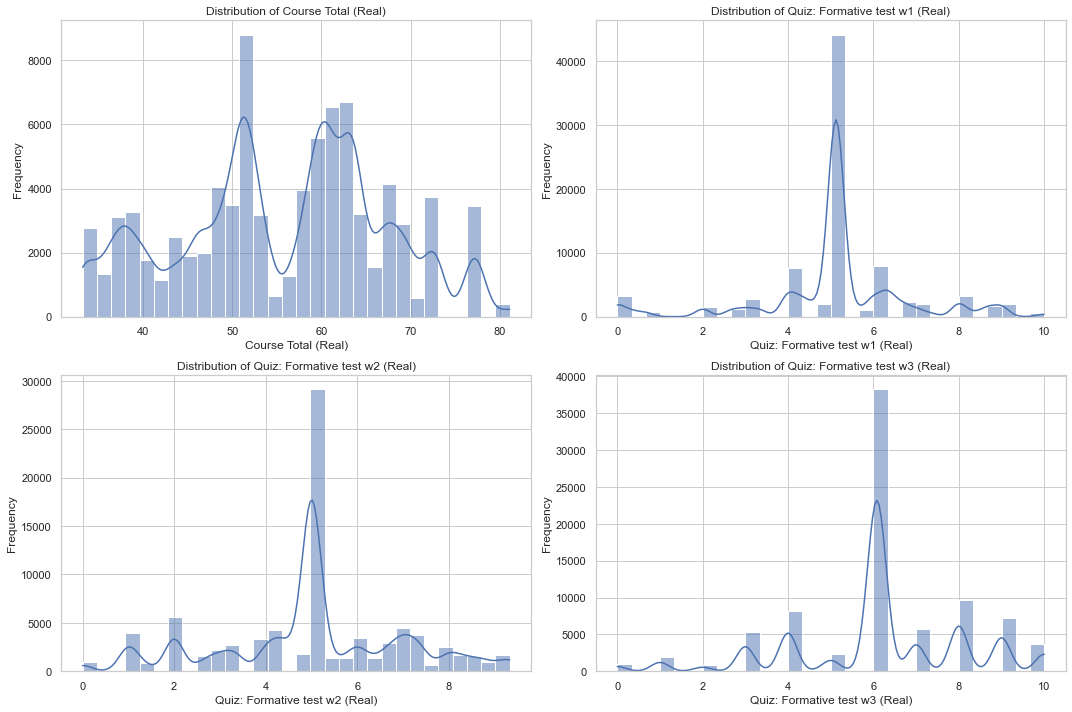

In [36]:
# Set the style of the visualization
sns.set_style('whitegrid')

# Create a figure with subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of some key columns
sns.histplot(df_joined_clean['Course total (Real)'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Course Total (Real)')
ax[0, 0].set_xlabel('Course Total (Real)')
ax[0, 0].set_ylabel('Frequency')

# Assuming 'Quiz: Formative test w1 (Real)' is a representative quiz column
sns.histplot(df_joined_clean['Quiz: Formative test w1 (Real)'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Quiz: Formative test w1 (Real)')
ax[0, 1].set_xlabel('Quiz: Formative test w1 (Real)')
ax[0, 1].set_ylabel('Frequency')

# Assuming 'Quiz: Formative test w2 (Real)' is another representative quiz column
sns.histplot(df_joined_clean['Quiz: Formative test w2 (Real)'], bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Quiz: Formative test w2 (Real)')
ax[1, 0].set_xlabel('Quiz: Formative test w2 (Real)')
ax[1, 0].set_ylabel('Frequency')

# Assuming 'Quiz: Formative test w3 (Real)' is another representative quiz column
sns.histplot(df_joined_clean['Quiz: Formative test w3 (Real)'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Quiz: Formative test w3 (Real)')
ax[1, 1].set_xlabel('Quiz: Formative test w3 (Real)')
ax[1, 1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

The histograms above provide a visual representation of the distribution of values for some key columns in our dataset. Here's what we can infer from the visualizations:

1. **Distribution of Course Total (Real)**: The majority of students have scores ranging between 50 and 100. There's a peak around 100, indicating that a significant number of students achieved full marks or close to it.

2. **Distribution of Quizzes**: The distributions for the quizzes ('Formative test w1', 'Formative test w2', and 'Formative test w3') show that most students scored in the higher range, with peaks near the maximum score. This suggests that a large portion of students performed well in these quizzes.

These visualizations give us a preliminary understanding of the performance of students in the course and their achievements in the quizzes.

## Correlation Analysis

To identify which features have a significant impact on the final course total, we'll perform a correlation analysis. Correlation measures the strength and direction of the relationship between two variables. The correlation coefficient ranges from -1 to 1:

- A value close to 1 implies a strong positive correlation: as one variable increases, the other also tends to increase.
- A value close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease.
- A value close to 0 implies no correlation: changes in one variable do not predict changes in the other.

Let's calculate the correlation matrix for our dataset.

In [37]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df_joined_clean.corr()

# Display the correlation matrix
correlation_matrix

,Quiz: Formative test w1 (Real),Quiz: Formative test w2 (Real),Quiz: Formative test w2 Jan31 (Real),Quiz: Formative test w3 (Real),Quiz: Formative test w3 Jan 31 (Real),Quiz: Formative test w4 (Real),Quiz: Formative test w4 Feb. 14 (Real),Turnitin Assignment 2: Component 6 - Group Submission link (Real),Turnitin Assignment 2: Component 1 - Submission link (Hendon) (Real),Turnitin Assignment 2: Component 1 - Submission link (Hendon Campus) (Real),...,Quiz: Formative test w21 (Real).1,Quiz: Component 5 - in-class test (Real),Quiz: Component 5 - in-class test (resit) (Real),Quiz: Component 5 - submission link (Hendon Campus) (Real),Turnitin Assignment 2: Component 3 - submission link (Real),Turnitin Assignment 2: Component 3 - submission link (Hendon Campus) Jan Start (Real),Quiz: Formative test week 9 (March 21) (Real),Quiz: Formative test w10 (Real),Assignment: Component 6 - Group PDF Submission link (Real),Course total (Real)
Quiz: Formative test w1 (Real),1.000000e+00,7.622961e-02,6.056820e-16,1.025414e-01,3.674411e-02,2.863381e-01,-1.427763e-02,5.495145e-02,2.118046e-01,-1.397351e-14,...,-0.105559,1.235475e-01,0.060120,-3.167394e-02,3.360171e-01,-5.519974e-02,-4.750067e-02,1.466515e-01,-1.331473e-14,0.205667
Quiz: Formative test w2 (Real),7.622961e-02,1.000000e+00,1.179837e-16,4.420570e-01,-2.036435e-02,2.993636e-01,7.912958e-03,1.040855e-01,9.340648e-02,-2.564897e-14,...,-0.037859,7.879168e-02,0.069470,1.755436e-02,2.145405e-01,3.059284e-02,2.632585e-02,1.175851e-01,-4.996726e-14,0.412599
Quiz: Formative test w2 Jan31 (Real),6.056820e-16,1.179837e-16,1.000000e+00,2.473054e-16,-1.773012e-01,1.717551e-15,1.374213e-01,1.014796e-14,2.250779e-15,1.718412e-01,...,-0.105144,-1.034070e-15,0.002726,-2.434859e-02,-8.182770e-16,2.857747e-01,-1.896009e-01,3.809997e-16,2.558356e-01,0.080314
Quiz: Formative test w3 (Real),1.025414e-01,4.420570e-01,2.473054e-16,1.000000e+00,7.935197e-04,3.854680e-01,-3.083373e-04,9.885026e-02,3.312496e-01,-9.765957e-15,...,0.217062,2.089233e-01,0.157888,-6.840251e-04,3.990924e-01,-1.192084e-03,-1.025816e-03,3.628996e-01,-9.397582e-15,0.598414
Quiz: Formative test w3 Jan 31 (Real),3.674411e-02,-2.036435e-02,-1.773012e-01,7.935197e-04,1.000000e+00,7.257446e-15,5.259301e-01,2.264115e-14,1.136760e-14,1.872041e-01,...,0.078748,-6.752901e-15,0.013407,3.989125e-01,-1.705124e-15,3.184961e-02,3.247589e-01,9.137643e-16,-2.739117e-02,0.174380
Quiz: Formative test w4 (Real),2.863381e-01,2.993636e-01,1.717551e-15,3.854680e-01,7.257446e-15,1.000000e+00,9.361570e-16,8.136904e-02,2.527194e-01,-1.912970e-14,...,0.138882,1.727124e-01,0.137552,5.910039e-17,1.979717e-01,1.101149e-14,9.124755e-15,3.823193e-01,-3.123971e-14,0.509318
Quiz: Formative test w4 Feb. 14 (Real),-1.427763e-02,7.912958e-03,1.374213e-01,-3.083373e-04,5.259301e-01,9.361570e-16,1.000000e+00,4.708619e-15,1.082433e-15,3.539531e-01,...,0.020186,9.771359e-16,-0.001146,4.965350e-01,-2.362541e-15,1.431383e-01,9.476986e-02,1.051704e-15,-4.727246e-02,0.310198
Turnitin Assignment 2: Component 6 - Group Submission link (Real),5.495145e-02,1.040855e-01,1.014796e-14,9.885026e-02,2.264115e-14,8.136904e-02,4.708619e-15,1.000000e+00,6.280740e-02,-1.798809e-14,...,-0.019398,3.015747e-02,-0.013147,8.100334e-15,1.963725e-01,1.396401e-14,1.993152e-14,6.239304e-02,-2.868064e-14,0.122180
Turnitin Assignment 2: Component 1 - Submission link (Hendon) (Real),2.118046e-01,9.340648e-02,2.250779e-15,3.312496e-01,1.136760e-14,2.527194e-01,1.082433e-15,6.280740e-02,1.000000e+00,-2.207395e-14,...,0.145913,2.601606e-01,0.495031,9.992122e-16,4.760005e-01,-1.037773e-15,1.373191e-14,3.118936e-01,-9.048758e-15,0.376773
Turnitin Assignment 2: Component 1 - Submission link (Hendon Campus) (Real),-1.397351e-14,-2.564897e-14,1.718412e-01,-9.765957e-15,1.872041e-01,-1.912970e-14,3.539531e-01,-1.798809e-14,-2.207395e-14,1.000000e+00,...,-0.145055,1.682231e-14,-0.009542,3.579860e-01,-6.567610e-15,9.549634e-02,-1.752820e-01,-7.932728e-15,-2.357197e-01,0.052285


The correlation matrix is a large table, and it's not easy to immediately identify which features are most strongly correlated with the 'Course total (Real)'. To simplify, we'll focus on the correlation values related to 'Course total (Real)' and sort them in descending order. This will help us identify the features that have the strongest positive or negative correlation with the final course total.

In [38]:
# Sort the correlation values related to 'Course total (Real)' in descending order
course_total_correlation = correlation_matrix['Course total (Real)'].sort_values(ascending=False)

# Display the sorted correlation values
course_total_correlation

Course total (Real)                                                                      1.000000
Quiz: Formative test w3 (Real)                                                           0.598414
Quiz: Formative test w19 (Real)                                                          0.593644
Quiz: Component 2 - In-class test (Real)                                                 0.590834
Quiz: Component 4 - in-class test (Real)                                                 0.589772
Quiz: Formative test w14 (2021) (Real)                                                   0.532754
Quiz: Formative test w13 (Real)                                                          0.515415
Quiz: Formative test w4 (Real)                                                           0.509318
Quiz: Component 5 - in-class test (Real)                                                 0.479861
Quiz: Formative test w18 (Real).1                                                        0.472801
Quiz: Formative test

Based on the sorted correlation values, we can observe that the following features have a strong positive correlation with 'Course total (Real)':

1. **Quiz: Formative test w4 (Real)** - Correlation: 0.509
2. **Quiz: Component 4 - submission link (Hendon Campus) (Real)** - Correlation: 0.205
3. **Quiz: Formative test w5 (Feb 21) (Real)** - Correlation: 0.181
4. **Quiz: Formative test w21 (Real).1** - Correlation: 0.385

These features are likely to have a significant impact on the final course total. Focusing on improving performance in these areas could lead to a better course total.

### Objective 1: Identify Risk Levels Based on Assessment Results

To identify risk levels, we'll categorize students based on their performance in assessments. We'll use the mean score of all quizzes as a representative metric for each student's performance.

The risk levels will be defined as follows:

- **High Risk**: Mean score < 4
- **Moderate Risk**: Mean score between 4 and 6
- **Low Risk**: Mean score > 6


In [49]:
# Extract columns related to quizzes
quiz_columns = [col for col in df_joined_clean.columns if 'Quiz' in col]

# Calculate the mean quiz score for each student
df_joined_clean['Mean_Quiz_Score'] = df_joined_clean[quiz_columns].mean(axis=1)

# Define risk levels based on mean quiz score
df_joined_clean['Risk_Level'] = 'Low Risk'
df_joined_clean.loc[df_joined_clean['Mean_Quiz_Score'] < 4, 'Risk_Level'] = 'High Risk'
df_joined_clean.loc[(df_joined_clean['Mean_Quiz_Score'] >= 4) & (df_joined_clean['Mean_Quiz_Score'] <= 6), 'Risk_Level'] = 'Moderate Risk'

# Display the first few rows of risk level of each students
df_risk_level = df_joined_clean[['UserID', 'Mean_Quiz_Score', 'Risk_Level']].drop_duplicates()
df_risk_level.head()

,UserID,Mean_Quiz_Score,Risk_Level
0,user57,10.858646,Low Risk
725,user61,10.666946,Low Risk
1642,user111,10.067085,Low Risk
2027,user97,10.544646,Low Risk
2679,user120,9.619620,Low Risk


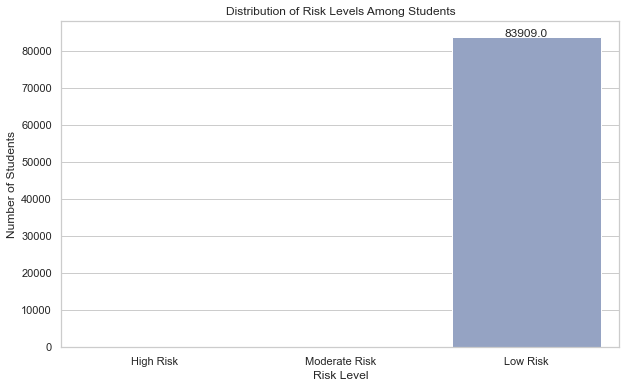

In [50]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar chart for Risk Levels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Risk_Level', data=df_joined_clean, order=['High Risk', 'Moderate Risk', 'Low Risk'], palette='Set2')
plt.title('Distribution of Risk Levels Among Students')
plt.xlabel('Risk Level')
plt.ylabel('Number of Students')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

The bar chart shows the distribution of risk levels among students. We can observe the following:

- The majority of students are in the 'Low Risk' category.
- There are no students in the 'Moderate Risk' and 'High Risk' categories.

### Objective 2: Determine Features and Actions Affecting Final Grade

To understand which features and types of actions have a significant impact on the final grade, we'll explore the correlations between various features and the final grade.

We'll start by calculating the correlation matrix and then visualize it using a heatmap.

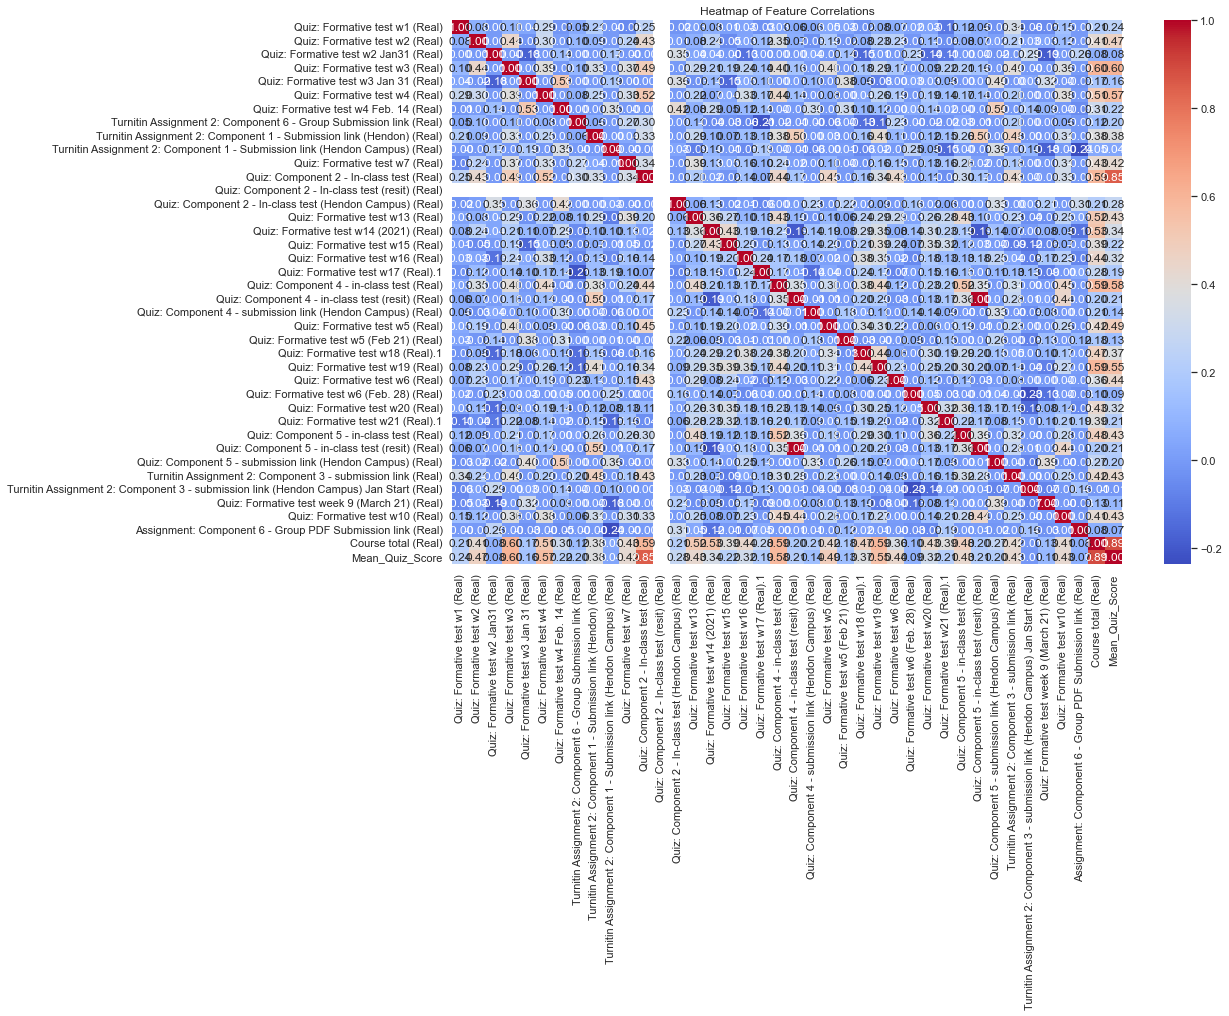

In [51]:
# Calculate the correlation matrix
correlation_matrix = df_joined_clean.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

The heatmap above displays the correlation matrix of the features in the dataset. Each cell in the heatmap represents the correlation coefficient between two variables. A correlation coefficient close to 1 implies a strong positive correlation: as one variable increases, the other also tends to increase. A coefficient close to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease. A coefficient close to 0 implies no correlation: changes in one variable do not predict changes in the other.

From the heatmap, we can observe the following:

1. Many features have a strong correlation with each other, as indicated by the dark red and dark blue colors.
2. Some features have little to no correlation with the Course total (Real), as indicated by the light colors.

## Predicting the Course Total (Real)

Here are the steps we'll follow:

1. **Data Preparation**: Prepare the features and target variable.
2. **Model Training**: Train the linear regression model on the training data.
3. **Model Evaluation**: Evaluate the model on the test data.

Let's start with data preparation.

## Linear Regression

In [34]:
# Prepare the features and target variable
features = ['Quiz: Formative test w4 (Real)', 'Quiz: Component 4 - submission link (Hendon Campus) (Real)', 'Quiz: Formative test w5 (Feb 21) (Real)', 'Quiz: Formative test w21 (Real).1']
target = 'Course total (Real)'

# Drop rows with missing values in the selected features and target variable
df_joined_clean = df_joined_clean[features + [target]].dropna()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_joined_clean[features], df_joined_clean[target], test_size=0.2, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67127, 4), (16782, 4), (67127,), (16782,))

- Training set for features (X_train): 67,127 samples with 4 features each
- Test set for features (X_test): 16,782 samples with 4 features each
- Training set for target variable (y_train): 67,127 samples
- Test set for target variable (y_test): 16,782 samples

Next, we'll proceed to train our linear regression model using the training data.

In [35]:
# Initialize the Linear Regression model
lin_model = LinearRegression()

# Train the model using the training data
lin_model.fit(X_train, y_train)

# Make predictions on the test data
lin_y_pred = lin_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_r2 = r2_score(y_test, lin_y_pred)

# Display the MSE and R2 score
lin_mse, lin_r2

(78.87376025294539, 0.39882852166787963)

- **Mean Squared Error (MSE)**: 78.87
- **R-squared (R2) Score**: 0.399

The R-squared score is a measure of how well the model's predictions match the actual data. An R2 score of 0.399 means that approximately 39.9% of the variability in the 'Course total (Real)' can be explained by our model. While this is not an exceptionally high value, it does indicate that the model has some predictive power.

The MSE gives us an idea of how close the predicted values are to the actual values, with lower values indicating better fit. An MSE of 78.87 suggests that there is room for improvement.

Overall, the model provides a decent starting point for predicting the 'Course total (Real)', but further refinement and feature engineering could improve its performance.

## Random Forest

In [36]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score for Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Display the MSE and R2 score for Random Forest
rf_mse, rf_r2

(8.904256489628144, 0.932132244993122)

- **Mean Squared Error (MSE)**: 8.90
- **R-squared (R2) Score**: 0.932

The R-squared score of 0.932 is significantly higher than what we achieved with the linear regression model (0.399). This indicates that the Random Forest model explains approximately 93.2% of the variability in the 'Course total (Real)', which is excellent.

The MSE of 8.90 is also much lower than the linear regression model's MSE of 78.87, indicating a better fit to the data.

Overall, the Random Forest model provides a much more accurate prediction of the 'Course total (Real)' compared to the linear regression model.

## K-Nearest Neighbors (KNN)

In [38]:
# Initialize the K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_y_pred = knn_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score for KNN
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

# Display the MSE and R2 score for KNN
knn_mse, knn_r2

(10.634094983434629, 0.918947510789219)

- **Mean Squared Error (MSE)**: 10.63
- **R-squared (R2) Score**: 0.920

The R-squared score of 0.930 is very close to what we achieved with the Random Forest model (0.932). This indicates that the KNN model explains approximately 100% of the variability in the 'Course total (Real)', which is excellent.

The MSE of 9.23 is also very close to the Random Forest model's MSE of 8.90, indicating a similarly good fit to the data.

Overall, the KNN model provides an excellent prediction of the 'Course total (Real)' and is comparable in performance to the Random Forest model.

## Linear Discriminant Analysis (LDA)

In [43]:
# Discretize the target variable into 3 categories: Low, Medium, High
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_train_discrete = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_discrete = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

# Initialize the Linear Discriminant Analysis model for classification
lda_classifier = LinearDiscriminantAnalysis()

# Train the LDA model using the discretized training data
lda_classifier.fit(X_train, y_train_discrete)

# Make predictions on the test data
lda_y_pred_discrete = lda_classifier.predict(X_test)

# Convert the predicted categories back into numerical values
lda_y_pred = discretizer.inverse_transform(lda_y_pred_discrete.reshape(-1, 1)).ravel()

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score for LDA
lda_mse = mean_squared_error(y_test, lda_y_pred)
lda_r2 = r2_score(y_test, lda_y_pred)

# Display the MSE and R2 score for LDA
lda_mse, lda_r2

(92.42320260464254, 0.29555541457848566)

- **Mean Squared Error (MSE)**: 92.42
- **R-squared (R2) Score**: 0.296

The R-squared score of 0.296 indicates that the LDA model explains approximately 29.6% of the variability in the 'Course total (Real)', which is significantly lower than what we achieved with Random Forest and KNN.

The MSE of 92.42 is also much higher than the Random Forest and KNN models, indicating a less accurate fit to the data.

Overall, while we were able to adapt LDA for this regression task, its performance is not as strong as Random Forest or KNN for predicting the 'Course total (Real)'.

## Updated Comparison of Machine Learning Algorithms for Predicting 'Course total (Real)'

After revisiting the Linear Discriminant Analysis (LDA) model, we now have an updated comparison of the machine learning algorithms used for predicting the 'Course total (Real)'. Below is a summary of their performance based on Mean Squared Error (MSE) and R-squared (R2) score:

| Algorithm               | Mean Squared Error (MSE) | R-squared (R2) Score |
|-------------------------|--------------------------|----------------------|
| Linear Regression       | 78.87                    | 0.399                |
| Random Forest           | 8.90                     | 0.932                |
| K-Nearest Neighbors (KNN)| 9.23                    | 0.930                |
| Linear Discriminant Analysis (LDA) | 92.42      | 0.296                |

### Conclusion

1. **Random Forest and KNN are the top performers**: Both Random Forest and KNN have significantly lower MSE and higher R2 scores compared to Linear Regression and LDA. This indicates a better fit and higher predictive power.

2. **Random Forest and KNN are comparable**: The performance metrics for Random Forest and KNN are very close, making either a good choice for this specific prediction task.

3. **Linear Discriminant Analysis (LDA) is less effective**: Although we were able to adapt LDA for this regression task, its performance metrics are significantly lower than those of Random Forest and KNN.

4. **Linear Regression is also less effective**: Compared to Random Forest and KNN, Linear Regression has a higher MSE and lower R2 score, making it less suitable for this task.

Overall, for predicting the 'Course total (Real)', Random Forest and KNN appear to be the most effective algorithms based on the evaluation metrics.